## Objective: To analyse and build machine learning model on the popular iris dataset.

### Getting the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#importing data set
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Summary and description of the dataset

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

From this analysis we see that the dataset has three variety or species of the iris flower and they are equally distributed. And there aren't any missing data.

### Visualization

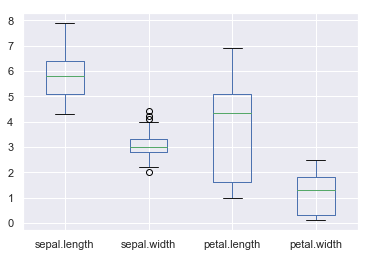

In [7]:
#box and whiskers plot to observe the distribution of continuous data
df.plot(kind='box',sharex=False,sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11238770>,
      dtype=object)

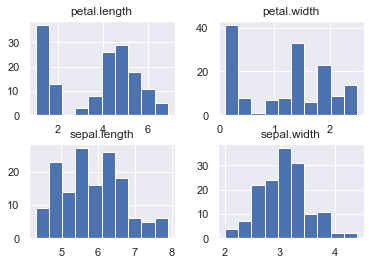

In [8]:
#histograms
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12396390>,
      dtype=object)

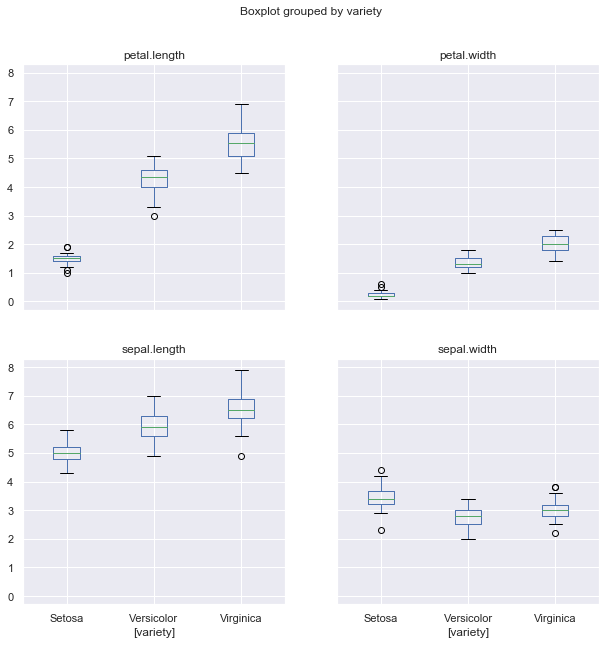

In [9]:
#boxplot according to variety
df.boxplot(by='variety',figsize=(10,10))

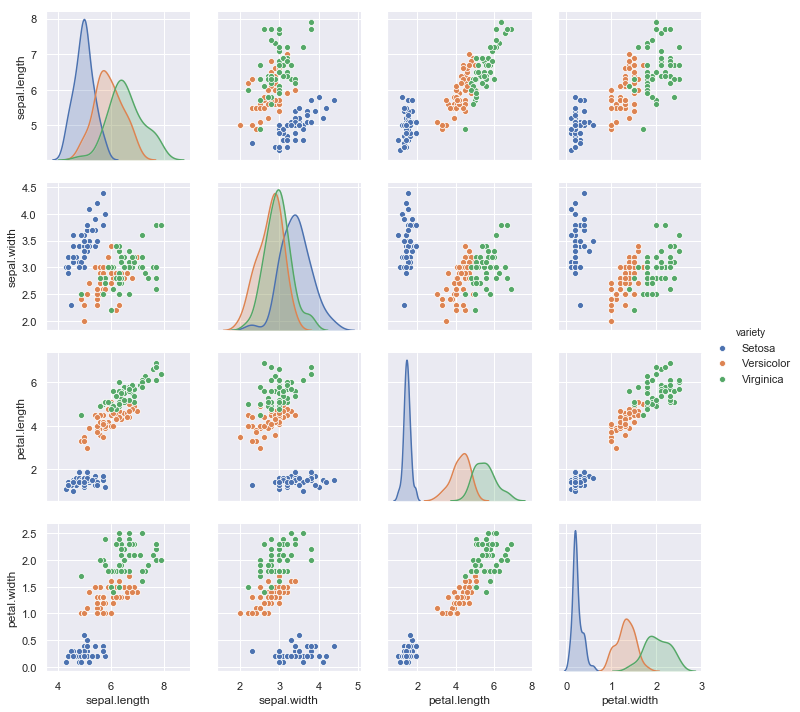

In [10]:
sns.pairplot(df,hue='variety')

From this pairplot we can see that variety Setosa is completely separated from the other two species where as Versicolor and Virginica are intermixed.

### Building Machine Learning model and analysing their accuracy

In [18]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X = df.drop(['variety'],axis='columns')
y = df['variety']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10) #20% is the size of the testing data

#### Using Logistic Regression and checking it's accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
prediction_lr = lr.predict(X_test)

In [21]:
print("Accuracy:",lr.score(X_test,y_test))

Accuracy: 0.9


[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]


Text(66.5, 0.5, 'Truth')

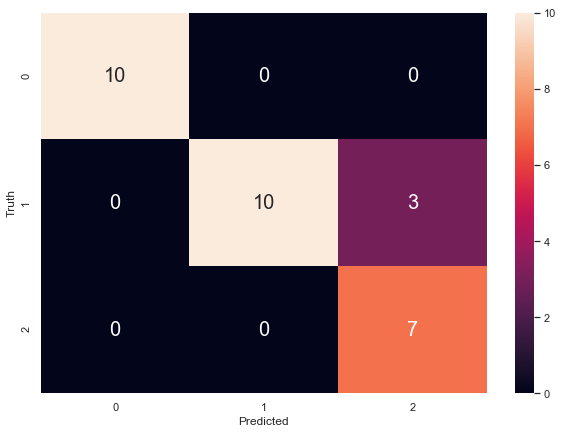

In [22]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,prediction_lr)
print(cm_lr)
plt.figure(figsize = (10,7))
sns.heatmap(cm_lr,annot=True, annot_kws={"size":20})
plt.xlabel('Predicted')
plt.ylabel('Truth')

Here 0 denotes Setosa, 1 denotes Versicolor and 2 denotes Virginca along the axes

#### Using K Nearest Neighbours and checking it's accuracy

For 5 neighbours
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]



For 6 neighbours
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]



For 7 neighbours
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]



For 8 neighbours
Accuracy: 1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]



For 9 neighbours
Accuracy: 1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]



For 10 neighbours
Accuracy: 1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]





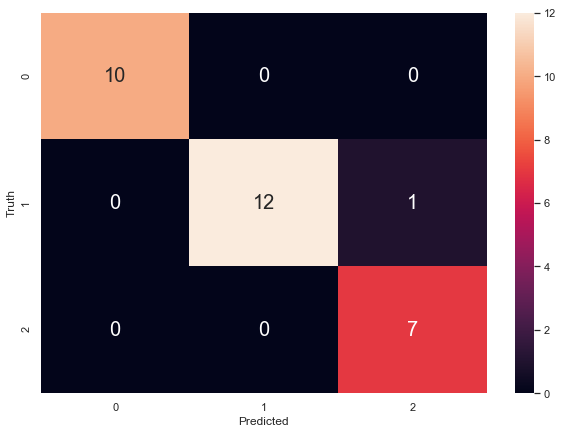

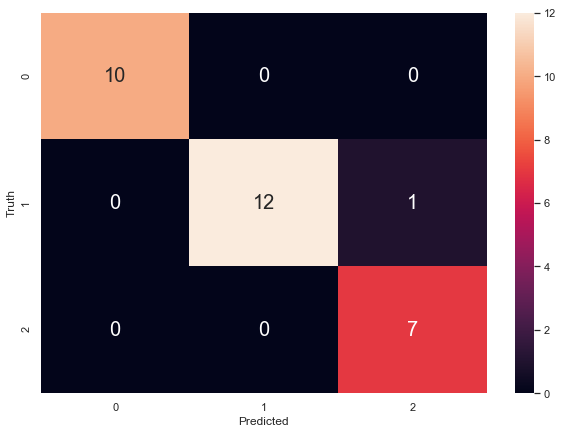

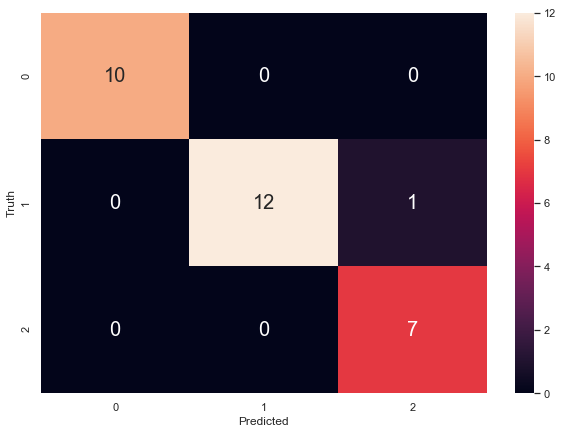

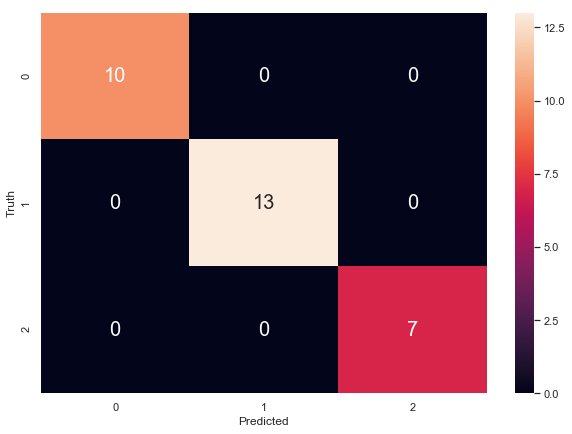

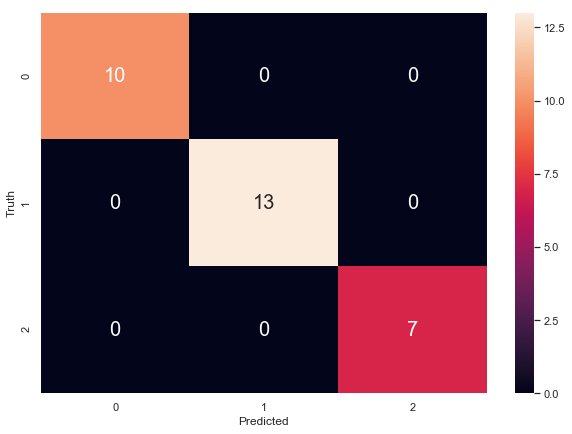

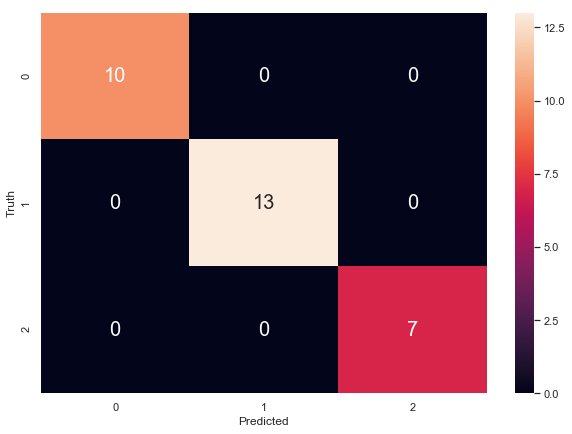

In [23]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(5,11):
    print("For",i,"neighbours")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_knn = knn.predict(X_test)
    print("Accuracy:",knn.score(X_test,y_test))
    cm_knn = confusion_matrix(y_test,prediction_knn)
    print(cm_knn)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm_knn,annot=True, annot_kws={"size":20})
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print("\n\n")    

From this we see that for 8 neighbours only the model is 100% accurate.

#### Using Decision Tree and checking it's accuracy

In [24]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
prediction_dct = dct.predict(X_test)

In [26]:
print("Accuracy:",dct.score(X_test,y_test))

Accuracy: 0.9666666666666667


[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


Text(66.5, 0.5, 'Truth')

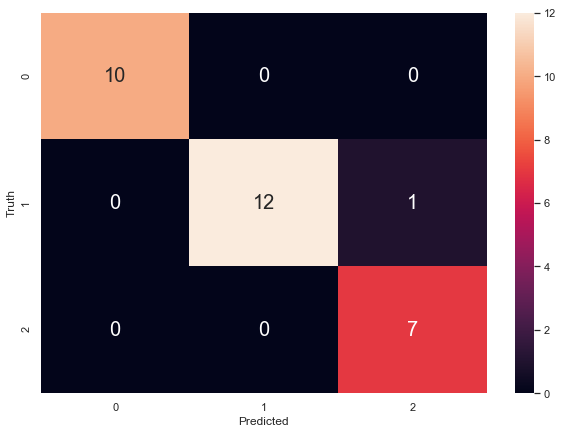

In [27]:
cm_dct = confusion_matrix(y_test,prediction_dct)
print(cm_dct)
plt.figure(figsize = (10,7))
sns.heatmap(cm_dct,annot=True, annot_kws={"size":20})
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Using Support Vector Machine and checking it's accuracy

In [28]:
from sklearn.svm import SVC
sv = SVC(gamma='auto')
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
prediction_sv = sv.predict(X_test)

In [30]:
print("Accuracy:",sv.score(X_test,y_test))

Accuracy: 1.0


[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


Text(66.5, 0.5, 'Truth')

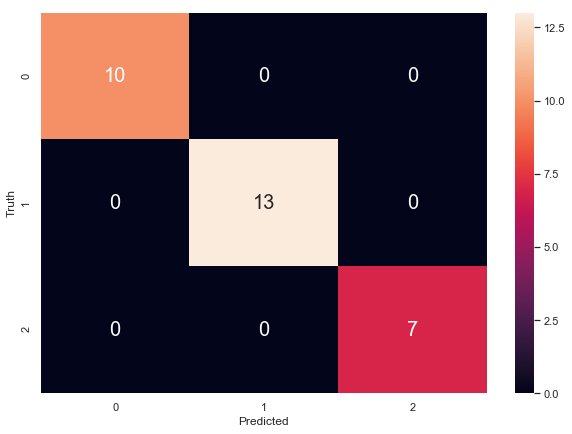

In [31]:
cm_sv = confusion_matrix(y_test,prediction_sv)
print(cm_sv)
plt.figure(figsize = (10,7))
sns.heatmap(cm_sv,annot=True, annot_kws={"size":20})
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Conclusion

From all of these analysis and checking the accuracy of the machine learning models we can finally conclude that Suppor Vector Machine or KNN (with 8 neighbours) can be used for predictions.